# Holt Winters

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../jena_climate_2009_2016.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


测试合成数据集

In [6]:
# 生成测试数据
x=np.linspace(0,8*2*np.pi,8*1440)
y=0.8 * np.sin(x) + 0.10 * np.random.randn(8 * 1440)
series = pd.Series(y)

<AxesSubplot:>

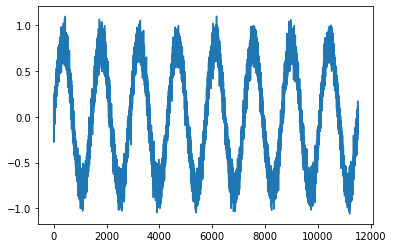

In [7]:
series.plot.line()

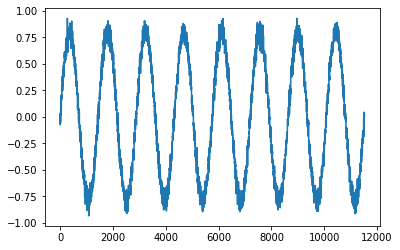

In [13]:
holt_winters(series)

测试真实数据集

<AxesSubplot:>

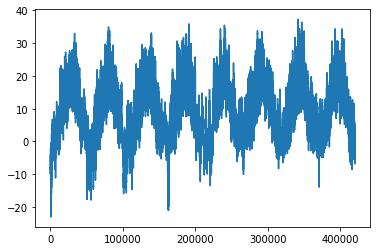

In [14]:
df.iloc[:, 2].plot.line()

<AxesSubplot:>

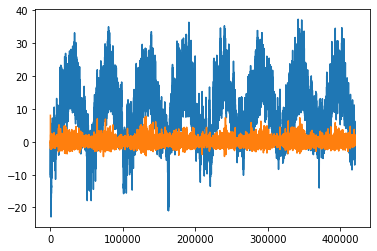

In [27]:
series = np.array(df.iloc[:, 2].values)
y_prd = holt_winters(series, m=52569)
pd.Series(y_prd).plot.line()
pd.Series(y_prd - series).plot.line()

<AxesSubplot:ylabel='Frequency'>

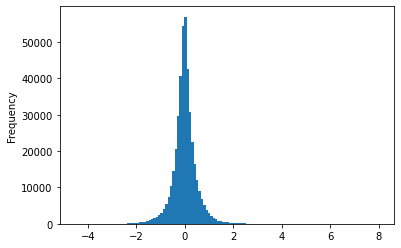

In [33]:
pd.Series(y_prd - series).plot.hist(bins=128)

<AxesSubplot:ylabel='Frequency'>

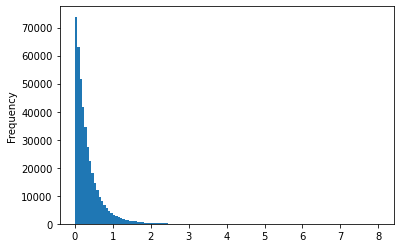

In [32]:
pd.Series(np.abs(y_prd - series)).plot.hist(bins=128)

Conclusions<br/>
- <b>预测误差符合正态分布</b>

# Code Repo

In [26]:
'''
    stream detector: holt winters
    @param m period
'''
def holt_winters(series, m=1440):
    def update_array(array, update):
        updated = np.roll(array, -1)
        updated[-1] = update
        return updated
    alpha = beta = gamma = 0.2
            # hyper parameters
    n = series.size
            # sample length
    l_lag = 0 # $l_{t-1}$
    b_lag = 0 # $b_{t-1}$
    s_lag = np.zeros(shape=(m))
            # $s_{t-1}$
    y_prd = np.zeros(shape=(n))
            # predictions
    for i in range(0, n):
        y_t = series[i]
            # observation
        y_hat = l_lag + b_lag + s_lag[0]
            # equation 1
        l_t = alpha * (y_t - s_lag[0]) + (1-alpha) * (l_lag + b_lag)
            # equation 2
        b_t = beta * (l_t - l_lag) + (1-beta) * b_lag
            # equation 3
        s_t = gamma * (y_t - l_lag - b_lag) + (1-gamma) * s_lag[0]
            # equation 4
        l_lag = l_t
        b_lag = b_t
        update_array(s_lag, s_t)
        y_prd[i] = y_hat
    return y_prd